# Análisis de personas

Objetivo, predecir la rotación de empleados. Esto esta relacionado con los primeros dos puntos:

- Contratación.
- Retención de empleados.

La rotación de empleados es el proceso en el que los empleados abandonan la empresa también conocido como desgaste de empleados o rotación de empleados.

Cuando los empleados calificados se van, puede ser muy costoso para la empresa, por lo que las empresas están interesadas en predecir la rotación de antemano. Por lo tanto, la empresa puede cambiar su estrategia para retener buenos trabajadores o iniciar el preoceso de contratación de nuevos empleados a tiempo.

En este análisis utilizaremos datos de empleados de muestra con variables que describen a los empleados con el objetivo de comprender cuáles son las características más importantes que les afectan.

Para ello se realizará lo siguente:

1. Análisis descriptivo y transformación de datos.
2. Predecir la rotación de empleados.
3. Evaluación del modelo de predicción.
4. Elegir el mejor modelo de predicción.

In [15]:
# LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

In [16]:
# Importar datos
data = pd.read_csv('data/turnover.csv')

## Análisis descriptivo y transformación de datos

In [17]:
# Información de cada columna y fila
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [18]:
print(data.describe())

       satisfaction    evaluation  number_of_projects  average_montly_hours  \
count  14999.000000  14999.000000        14999.000000          14999.000000   
mean       0.612834      0.716102            3.803054            201.050337   
std        0.248631      0.171169            1.232592             49.943099   
min        0.090000      0.360000            2.000000             96.000000   
25%        0.440000      0.560000            3.000000            156.000000   
50%        0.640000      0.720000            4.000000            200.000000   
75%        0.820000      0.870000            5.000000            245.000000   
max        1.000000      1.000000            7.000000            310.000000   

       time_spend_company  work_accident         churn     promotion  
count        14999.000000   14999.000000  14999.000000  14999.000000  
mean             3.498233       0.144610      0.238083      0.021268  
std              1.460136       0.351719      0.425924      0.144281  
min 

Tenemos 10 variables diferentes sobre 15000 empleados. de las 10 variables sólo dos tienen el tipo objeto. Es decir, datos categóricos. Mientras los demás son flotantes o enteros. Es decir, numéricas.

In [19]:
# Visualizar las primeras 5 filas
print(data.head())

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0          0.38        0.53                   2                   157   
1          0.80        0.86                   5                   262   
2          0.11        0.88                   7                   272   
3          0.72        0.87                   5                   223   
4          0.37        0.52                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low  


Podemos observar que las últimas columnas son department y salary. Que dan información del departamento que trabaja el empleado y el salario que percibe. Esto con datos categóricos.

In [20]:
# Obtener valores únicos de la columna salary
print(data.salary.unique())

['low' 'medium' 'high']


In [21]:
# Obtener valores únicos de la columna department
print(data.department.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


### Transformar las columnas categóricas "department" y "salary" en numéricas

In [22]:
# Cambiar el tipo de columna "salary" a categórico
data.salary = data.salary.astype('category')

# Ordenar correctamente estos datos categóricos
data.salary = data.salary.cat.reorder_categories(['low','medium','high'])

# Codificar categorías con valores enteros
data.salary = data.salary.cat.codes

In [23]:
# Cambiar el tipo de columna "department" a variables ficticias (0,1)
departments = pd.get_dummies(data.department)

# Mostrar la primera 5 filas del "departments"
print(departments.head())

   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


Estos datos ficticios se manejan de la siguente manera: Supongamos que un empleado es del departamento de ventas, lo que significa que si tenemos una columna separada para cada departamento, entonces el empleado tendrá valor de 1 en la columna de ventas y 0 en las demás columnas de departamentos. Esto significa que tendremos que crear un nuevo DataFrame donde cada departamento sea una columna separada. 

In [24]:
# 'sales' es la columna que se eliminará del DataFrame 'departments'
departments = departments.drop('sales', axis = 1)

# Mostrar las primeras 5 filas del DataFrame actualizado
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


Ahora bien, debemos cuidarnos de un fenómeno conocido como trampa ficticia. Esta última es la situación en la que diferentes variables ficticias transmiten la misma información. Por ejemplo, el empleado de la muestra es del departamento de ventas. 

In [25]:
# Eliminar "department" de dataFrame, ya que no la usaremos.
data = data.drop('department', axis = 1)

### Estadísticas descriptivas

#### Tasa de rotación

Observemos que "churn" informa si el empleado se fue o no de la empresa.
  - Si el valor es 1. Entonces, el empleado se fue
  - Si el valor es 0. Entonces, se observa rotación.

In [26]:
# Conseguir el número total de observaciones
n_empleados = len(data)

# Imprimir el número de empleados que se fueron/ se quedaron
print(data.churn.value_counts())

# Imprimir la tasa de rotación de empleados que se fueron / se quedaron
print(data.churn.value_counts()/n_empleados*100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


Podemos ver que alrededor del 76% de los empleados se quedaron, mientras que el 24% se fue.

#### Correlaciones

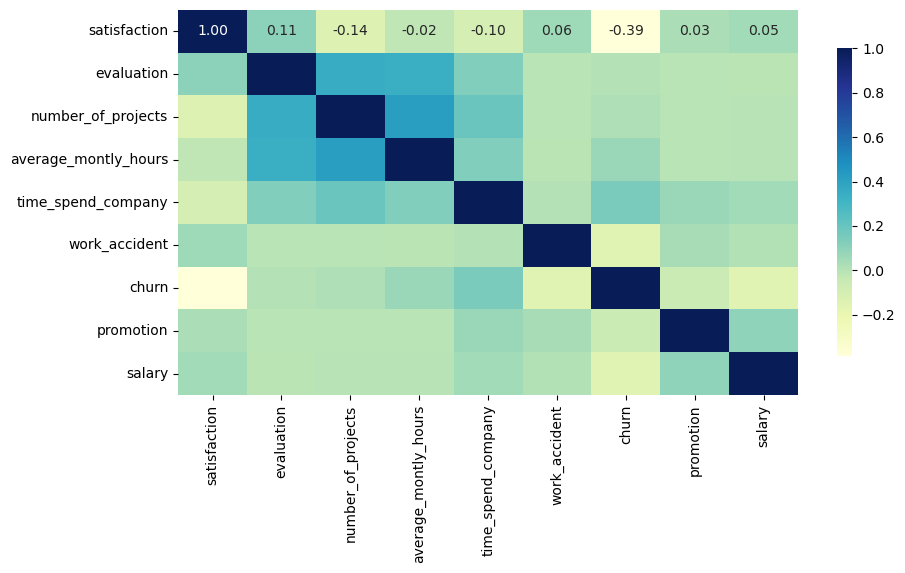

In [51]:
# Calcula la matriz de correlación del DataFrame 'data'
corr_matriz = data.corr()

# Crea una figura más grande
plt.figure(figsize=(10, 5))

# Crea un mapa de calor con la matriz de correlación usando seaborn
sns.heatmap(corr_matriz, annot=True, fmt=".2f", cbar_kws={"shrink": .8}, cmap="YlGnBu")

# Muestrar el gráfico
plt.savefig('correlacion.png')
plt.show()

Podemos ver que la variable "churn" tiene la correlación negativa más alta con el nivel de satisfacción "satisfaction". Esto nos muestra que el aumento en el nivel de satisfacción está asociado con una disminución en la probabilidad de rotación.

## Predecir la rotación de empleados

Nuestro objetivo será predecir: Churn.

Para ello necesitmoas realizar una predicción precisa y construir un algoritmo que pueda ser útil en la realidad. 

Comencemos dividiendo los datos en dos componentes: Entrenamiento y prueba. 

Entrenamiento se utiliza para realizar calculos, optimizaciones y desarrollo de algoritmos, muestra que prueba se utiliza para validarlo.

In [28]:
# Definir la variable objetivo 'churn'
target = data.churn

# Definir las características eliminando la columna 'churn' de los datos
features = data.drop('churn', axis = 1)

# Dividir los datos en conjuntos de entrenamiento y prueba con un tamaño de prueba del 25%
target_train, target_test, features_train, feature_test = train_test_split(target,
                                                                           features, 
                                                                           test_size = 0.25,
                                                                          random_state = 42)

La división de entrenamiento y prueba tiene que ver con el concepto de sobreajuste.

El sobreajutes es el problema más común que se alla en el análisis. nuestro primero objetivo es tener una precisión buena que pueda ayudarnos a realizar predicciones precisas. Sin embargo, un modelo que es preciso con un conjunto de datos, no podría serlo con otro. Por lo que queremos que nuestro modelo sea generalizable.

Ahora bien, el sobreajuste ocurre cuando el modelo funciona bien en el conjunto de datos en el que se desarrolló, pero no así fuera de ella. Por lo tanto, debemos devidir nuestro datos para asegurarnos que nuestro modelo no se ajusta demasiado a los datos de entranamiento.

### Clasificación del árbol de decisión

Dado que nuestro objeto tiene clasificación binaria, utilizaremos el árbol de decisión. Por dos motivos:

1. Es capaza de proporcionar prediccioes precisas.
2. Se puede utilizar para comprender los factores que están impulsando la decisión de abandonar la empresa

Se analiza primero con la columna de satisfacción ("satisfaction"), donde se prueba si para un determinado empleado el nivel de satisfacción fue superior a 0.5 o no. Si lo fue, vamos a la rama derecha del árbol, de lo contrario nos movemos a la izquierda. Si nos movemos hacia la derecha por ejemplo, la siguiente pregunta que debemos hacer de acuerdo con el árbol es si el salario es alto o no, si no es entonces avanzamos a uno de los últimos nodos u hoja del árbol, donde la salida es que el empleado no esta rotando.

Por lo tanto, los empleados con nivel de satisfacción alta y salario alto no rotan y lo contraro.

#### Regla de división

En general, el algorítmo de árbol de decisiones quiere lograr muestras tan puras en las últimas hojas como se posible. Por lo que se utilizará 2 reglas matemáticas para lograr esta tarea: 
- Gini: $2\cdot p\cdot (1-p)$
- Entropía: $-p\cdot \log(p)-(1-p)\cdot \log(1-p)$
  
Donde el objetivo es el mismo, minimizar gini o entropía. En ambos casos mostraran muestra más puras en los últimos nodos.

Acá utilizaremos Gini.

In [29]:
##### Gini: Recordando que se quedaron 11428 y se fueron 3571. Entonces,
total = 11428 + 3571
gini = 2*(11428/total * (3571/total))

In [30]:
gini

0.36279848707472784

In [31]:
# Crear un modelo de clasificación de árbol de decisión
model =  DecisionTreeClassifier(random_state = 42)

# Ajustar nuestras características al objeto
model.fit(features_train, target_train)

# Probar que tan bien se comoporta el modelo haciendo su predicción, calculando el puntaje de precisión de la predicción
print(model.score(features_train,target_train)*100)
print(model.score(feature_test,target_test)*100)

100.0
97.52


#### Visualizar del árbol de decisión

In [32]:
# Exportar el arbol a un archivo dot
export_graphviz(model,'tree.dot')

## Evaluación del modelo de predicción

Ajustaremos nuestro modelo para tener mejores resultados y controlar el sobreajuste.

Para ello, tenemos dos soluciones: o necesitamos limitar la profundidad máxima del árbol, es decir no dejemos que el arbol crezca más de 5 pasos o en todo caso limitaremos el tamaño de la muestra en cada hoja, por lo que no permitirá que el árbol crezca más si solo quedan 100 empleados en el nodo/hoja.

#### Límite en profundidad

In [33]:
# Crear un modelo de clasificación de árbol de decisión con una profundidad máxima de 5
model_depth_5 = DecisionTreeClassifier(max_depth = 5, random_state = 42)

# Ajustar nuestras características al objeto
model_depth_5.fit(features_train, target_train)

# Probar que tan bien se comoporta el modelo haciendo su predicción, calculando el puntaje de precisión de la predicción
print(model_depth_5.score(features_train,target_train)*100)
print(model_depth_5.score(feature_test,target_test)*100)

97.68868343852787
97.11999999999999


Nos damos cuenta que nos ayudara a mantener las pruebas por igual, lo que reducimos el sobreajuste y por lo tanto es modeloe más real.

#### Limite en tamaño o muestras

In [34]:
# Crear un modelo de clasificación de árbol de decisión con un límite de muestras de 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf = 100,
                                         random_state = 42)

# Ajustar nuestras características al objeto
model_sample_100.fit(features_train, target_train)

# Probar que tan bien se comoporta el modelo haciendo su predicción, calculando el puntaje de precisión de la predicción
print(model_sample_100.score(features_train,target_train)*100)
print(model_sample_100.score(feature_test,target_test)*100)

96.57747355320473
96.13333333333334


### Matriz de confusión.

- Si queremos mantener la antención en lo que se van, querremos falsos negativos, es decir, personas que se van pero el algoritmo no lo predice.
- Si queremos mantener la antención en los que se quedan los falsos positivos serán nuestro objetivo. 
- Podremos también observar cuál es el porcentaje de eprsonas que realmente se fueron entre aquellos que se predijo que se irían.

In [35]:
# Predecir si los empleados abandonarán la empresa utilizando el conjunto de prueba
prediction = model.predict(feature_test)

# Calcular la puntuación de precisión comparando target_test con la predicción
precision_score(target_test, prediction)

0.935064935064935

In [36]:
# Utilizar el modelo inicial para predecir la rotación
prediction = model.predict(feature_test)

# Calcular la puntuación de recuperación comparando target_test con la predicción
recall_score(target_test, prediction)

0.9632107023411371

### Puntuación AUC

Si nuestro objetivo es tener buenas predicción en ambas partes (se queda / se van), probablemente la mejor opción sea usar la puntuación AUC. Que significa Área bajo la curva y es básicamente un compuestode la medida que se maximiza cuando tanto el recuerdo como la especifidad se maximizan.

Para tal efecto, uno necesita colocar Recall en vertical y 1- la especificidad en el eje horizontal 

In [37]:
# Usar el modelo inicial para predecir la rotación (basado en las características del conjunto de prueba)
prediccion = model.predict(feature_test)

# Calcular la puntuación ROC/AUC comparando target_test con la predicción
roc_auc_score(target_test, prediccion)

0.9710901040622616

La precisión se concentra en el número de Falsos Positivos.

La combinación de esos dos resultados en la curva ROC nos permite medir tanto el recuerdo como la precisión. El área bajo la curva ROC se calcula como la puntuación AUC.

### Desequilibro de clases

El anterior método será una buena opción sólo si las clases en el conjunto de datos están equilibradas. Sin embargo el desquilibro de clases puede conducir a una mayor puntación de precisión, cuando de hecho nuestro modelo no puede predecir correctamente la rotación.  

para resolver el tema de desequilibro cambiamos las probabilidades previas. Como recordaremos el índice de Gini fue el objeto de nuestro árbol de decisiones que minimiza y se calculó en base a la probabilidad de ser 1 o 0; Cuando el árbol comienza  a crecer tomamos proporciones de 0 y 1 como probabilidades en Gini.

Cómo resultado, la clase 0 que son los que se quedan se vuelve más influyente ya que representa el 76% de las observaciones. Es por esta razón que el algoritmo pudo predecir mejor 0 que 1.

Para resolverlo equilibremos la clase 50/50. De donde AUC y espacialmente Recall deberían mejorar. Ya que ambas clases son igual de importantes.

In [38]:
# Inicializar el DecisionTreeClassifier
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Ajustar el modelo
model_depth_5_b.fit(features_train,target_train)

# Imprimir la precisión de la predicción (en puntos porcentuales) para el conjunto de prueba
print(model_depth_5_b.score(feature_test,target_test)*100)

93.57333333333332


In [39]:
# Imprimir la puntuación de recuperación
print(recall_score(target_test,prediction))

# Imprimir la puntuación ROC/AUC
print(roc_auc_score(target_test,prediction))

# Inicializar el modelo
model_depth_7_b = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42)

# Ajustar el modelo a la componente de entrenamiento
model_depth_7_b.fit(features_train,target_train)

# Realizar una predicción utilizando la componente de prueba
prediction_b = model_depth_7_b.predict(feature_test)

# Imprimir la puntuación de recuperación para el modelo equilibrado
print(recall_score(target_test,prediction_b))

# Imprimir la puntuación ROC/AUC para el modelo equilibrado
print(roc_auc_score(target_test,prediction_b))


0.9632107023411371
0.9710901040622616
0.9331103678929766
0.960246035681504


Lo más relevante de las salidas es que ambos modelos de clasificación, el inicial y el equilibrado, tienen un buen rendimiento en la identificación de casos positivos y en la distinción entre clases. Sin embargo, el modelo inicial tiene ligeramente mejores métricas (Recall Score de 0.9632 y ROC/AUC Score de 0.9711) en comparación con el modelo equilibrado (Recall Score de 0.9331 y ROC/AUC Score de 0.9602).

## Elegir el mejor modelo de predicción

¿A que profundidad máxima o a que límite de muestras debe establederse el modelo?. Encontremos los valores óptimos de esos hiperparámetros.

La profundidad máxima no debe alcanzar valores muy altos, ya que el árbol comenzará a sobreajustar, y si se alcanza valores bajos tampoco serán aceptables, debido a que pueden proporcionar predicciones sesgadas y menos precisas.

Similarmente para el tamaño de muestra mínima, verificaremos valores medios.

Para este proposito realizaremos todas las combinaciones posibles entre estas dos técnicas y los compararemos para encontrar los valores que proporcionan el mejor rendimiento en el conjunto de prueba.

Este proceso se conoce como GRIDSEACH.

Luego, mientras que la división de entrenamiento/prueba asegura que el modelo no se ajuste demasiado al entrenamiento, el ajuste de hiperparámetros puede resultar en un sobreajuste del componente de prueba. Para ello se recomienda validar el modelo en diferentes componentes de prueba, lo cual se logra usando "Cross Validation".

Croos Validation dividi los datos en k componentes, donde cada componente tiene la oportunidad de ser el componente de prueba. Tener diferentes componente asegura que nuestro modelo no se ajuste demasiado al componente de prueba.

#### Validación cruzada

El sobreajuste del conjunto de datos es un problema común en la analítica. Esto sucede cuando un modelo ha aprendido los datos demasiado de cerca: tiene un gran rendimiento en el conjunto de datos en el que fue entrenado, pero no logra generalizar fuera de él.

Si bien la técnica de división de entrenamiento/prueba garantiza que el modelo no sobreajuste el conjunto de entrenamiento, el ajuste de hiperparámetros puede resultar en un sobreajuste del componente de prueba, ya que consiste en ajustar el modelo para obtener los mejores resultados de predicción en el conjunto de prueba. Por lo tanto, se recomienda validar el modelo en diferentes conjuntos de pruebas. La validación cruzada K-fold nos permite lograr esto:

- divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
- se ajusta al modelo, hace predicciones y calcula una puntuación (puede especificar si desea exactitud, precisión, recuperación…)
- repite el proceso k veces en total
- genera el promedio de las 10 puntuaciones

In [40]:
# Usar esa función para imprimir la puntuación de validación cruzada para 10 pliegues
print(cross_val_score(model,features,target,cv=10))

[0.98333333 0.982      0.97333333 0.96266667 0.95733333 0.974
 0.988      0.992      1.         1.        ]


#### Configurar los parámetros de GridSearch

Un hiperparámetro es un parámetro dentro de una función. Por ejemplo, max_deptho min_samples_leaf son hiperparámetros de la función DecisionTreeClassifier(). El ajuste de hiperparámetros es el proceso de probar diferentes valores de hiperparámetros para encontrar los óptimos: el que ofrece las mejores predicciones según sus objetivos. En sklearn, puede utilizar GridSearch para probar diferentes combinaciones de hiperparámetros. Aún mejor, puedes usar GridSearchCV() para probar diferentes combinaciones y ejecutar una validación cruzada en una sola función.

In [41]:
# Generar valores para la profundidad máxima
depth = [i for i in range(5,21,1)]

# Generar valores para el tamaño mínimo de muestra
samples = [i for i in range(50,500,50)]

# Crea el diccionario con los parámetros a verificar
parameters = dict(max_depth=depth, min_samples_leaf=samples)

#### Implementación de GridSeach

In [42]:
# importa la función GridSearchCV
from sklearn.model_selection import GridSearchCV

# configurar parámetros: hecho
parameters = dict(max_depth=depth, min_samples_leaf = samples)

# inicializa la función param_search usando la función GridSearchCV, el modelo inicial y los parámetros anteriores
param_search = GridSearchCV(model, parameters, cv = 3)

# ajusta param_search al conjunto de datos de entrenamiento
param_search.fit(features_train, target_train)

# imprime los mejores parámetros encontrados
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


### Importancia de las característica 

Una de las razones por la que usamos árboles de decisiones es por la interpretabilidad. Donde podemos también calcular la importancia de las características. Esto último es la disminución de Gini debido a la característica seleccionada.

Si alguna de las característica no son importantes se sugiere sacar del modelo.

In [43]:
#### Ordenar características importantes

Muchos modelos pueden proporcionar predicciones precisas, pero los árboles de decisión también pueden cuantificar el efecto de las diferentes características en el objetivo. Aquí puede indicarle qué características tienen el impacto más fuerte y más débil en la decisión de abandonar la empresa.

In [44]:
# Inicializa el mejor modelo con los parámetros óptimos
model_best = DecisionTreeClassifier(max_depth=5,
                                         min_samples_leaf = 50,
                                         class_weight="balanced",
                                         random_state=42)

# Ajustar el modelo a la componente de entrenamiento
model_best.fit(features_train,target_train)

# Calcular la importancia de las características
feature_importances = model_best.feature_importances_

# Crear una lista de características: hecho
feature_list = list(features)

# Guardar los resultados dentro de un DataFrame usando feature_list como índice
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Ordenr el DataFrame para conocer las características más importantes
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.454793
time_spend_company,0.398411
evaluation,0.104667
average_montly_hours,0.035024
number_of_projects,0.007105
work_accident,0.000000
promotion,0.000000
salary,0.000000


#### Seleccionar característica importantes.

In [45]:
# seleccionar solo las características con una importancia relativa superior al 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# crear una lista a partir de esas características
selected_list = selected_features.index

# transformar tanto las componentes features_train como features_test para incluir solo las características seleccionadas
features_train_selected = features_train[selected_list]
features_test_selected = feature_test[selected_list]

#### Desarrollar y probar el mejor modelo.

In [46]:
# Inicializar el mejor modelo usando los parámetros proporcionados en la descripción
model_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, class_weight="balanced", random_state=42)

# Ajustar el modelo usando solo las características seleccionadas del conjunto de entrenamiento: hecho
model_best.fit(features_train_selected, target_train)

# Realizar una predicción basada en la lista seleccionada de características del conjunto de prueba
prediction_best = model_best.predict(features_test_selected)

# Imprimir la precisión general del model_best
print(model_best.score(features_test_selected, target_test) * 100)

# Imprimir la puntuación de recuperación de las predicciones del modelo
print(recall_score(target_test, prediction_best) * 100)

# Imprimir la puntuación ROC/AUC de las predicciones del modelo
print(roc_auc_score(target_test, prediction_best) * 100)

93.46666666666667
91.9732441471572
92.95472582401672


## PREDICCIÓN

In [47]:
# Generar datos aleatorios para cada característica basándose en su media y desviación estándar
satisfaction = np.random.normal(0.612834, 0.248631, 1000)
evaluation = np.random.normal(0.716102, 0.171169, 1000)
number_of_projects = np.random.normal(3.803054, 1.232592, 1000)
average_montly_hours = np.random.normal(201.050337, 49.943099, 1000)
time_spend_company = np.random.normal(3.498233, 1.460136, 1000)
work_accident = np.random.choice([0, 1], size=1000, p=[1-0.144610, 0.144610])
churn = np.random.choice([0, 1], size=1000, p=[1-0.238083, 0.238083])
promotion = np.random.choice([0, 1], size=1000, p=[1-0.021268, 0.021268])
salary = np.random.choice([0, 1, 2], size=1000, p=[0.33,0.33,1-0.66])

# Crear un DataFrame de pandas con los datos generados
df = pd.DataFrame({
    'satisfaction': satisfaction,
    'evaluation': evaluation,
    'number_of_projects': number_of_projects,
    'average_montly_hours': average_montly_hours,
    'time_spend_company': time_spend_company,
    'work_accident': work_accident,
    'churn': churn,
    'promotion': promotion,
    'salary': salary
})

In [48]:
# PREDECIR
# Asegúrate de que df tenga las mismas características que usaste para entrenar el modelo
features_df = df[features_train_selected.columns]

# Realizar una predicción
prediction_df = model_best.predict(features_df)

# Convertir las predicciones a un DataFrame de pandas
prediction_df = pd.DataFrame(prediction_df, columns=['Prediction'])

# Contar la cantidad de 0s y 1s
counts = prediction_df['Prediction'].value_counts()

print(counts)

0    858
1    142
Name: Prediction, dtype: int64


0.858